In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

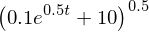

In [2]:
gamma, beta, k, m = args = var("gamma, beta, k, m")
t = var("t")

curve_expr = ((gamma + beta * exp(k * t)) ** m) 
display(curve_expr)
true_curve_expr = curve_expr.subs([(gamma, 10), (beta, 0.1), (k, 0.5), (m, 0.5)])
display(true_curve_expr)


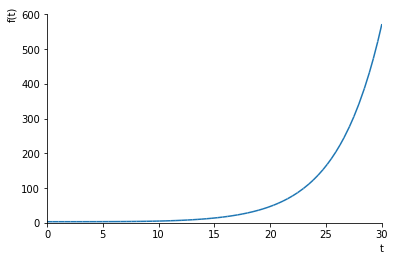

[(0, 3.1780497164141406), (5, 3.3493655214189966), (10, 4.9841063301516417), (15, 13.813190849532425)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 5)]
print(sample_data)

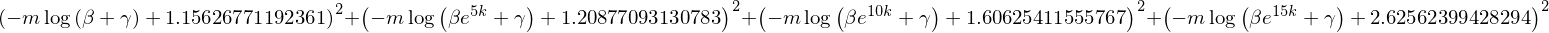

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    value = log(value)
    pred_value = expand_log(log(pred_value), force=True)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

seed_num = 431
np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [7]:
points_histories = []
local_minima = np.inf
for i in range(30):
    points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run(500)
    points_histories.append(points_history)
    local_minima = min(local_minima, _local_minima)
points_histories = np.array(points_histories)
print local_minima

4.47388960416e-11


In [8]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [9]:

X = ip([
    [interval[9.996, 10.001]],
    [interval[0.0996, 0.10003]],    
    [interval[0.4999, 0.500003]], 
    [interval[0.49999, 0.5000002]]
])

f(X)

In [10]:
kra = Krawczyk(df, ddf, X)

In [12]:
import time
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=200000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:4034, len(S):0, len(T):11, len(U):0

4034
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([9.999999999927955, 10.000000000076447])],
  [interval([0.09999999999981367, 0.10000000000020066])],
  [interval([0.4999999999990299, 0.5000000000010264])],
  [interval([0.4999999999983914, 0.5000000000015169])]],
 [[interval([9.99999999993216, 10.000000000072308])],
  [interval([0.09999999999982452, 0.10000000000018983])],
  [interval([0.49999999999908634, 0.500000000000971])],
  [interval([0.49999999999847855, 0.5000000000014284])]],
 [[interval([9.999999999932236, 10.00000000007238])],
  [interval([0.09999999999982494, 0.10000000000019003])],
  [interval([0.4999999999990875, 0.5000000000009717])],
  [interval([0.499999999998477, 0.5000000000014267])]],
 [[interval([9.999999999937867, 10.000000000066755])],
  [interval([0.09999999999983995, 0.10000000000017559])],
  [interval([0.49999999999916295, 0.50000000000

In [ ]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)